In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
import tensorflow as tf
sess = tf.Session()

x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [10]:
#Convert 1D to 2D
x_vals_column = x_vals[:,np.newaxis]

In [14]:
x_vals_column.ndim

2

In [13]:
x_vals.ndim

1

In [17]:
ones_column = np.repeat(1, 100)[:,np.newaxis]

In [25]:
A = np.hstack([x_vals_column, ones_column])

In [27]:
A.shape

(100, 2)

In [30]:
b = y_vals[:,np.newaxis]

In [31]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [32]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)

In [34]:
sess = tf.Session()

In [35]:
print(sess.run(tA_A))

[[ 3350.16835017   500.        ]
 [  500.           100.        ]]


In [36]:
tA_A_inv = tf.matrix_inverse(tA_A)

In [37]:
print(sess.run(tA_A_inv))

[[ 0.00117624 -0.00588119]
 [-0.00588119  0.03940594]]


In [38]:
product = tf.matmul(tA_A_inv,tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)

In [39]:
solution_eval = sess.run(solution)

In [45]:
solution_eval

array([[ 1.03561411],
       [ 0.03014179]])

In [41]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

slope: 1.03561410644
y_intercept: 0.0301417892892


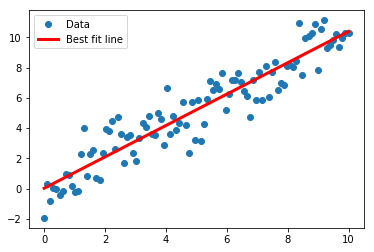

In [44]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

In [46]:
best_fit

[0.030141789289219983,
 0.13474927478829346,
 0.23935676028736691,
 0.34396424578644036,
 0.44857173128551386,
 0.55317921678458726,
 0.65778670228366076,
 0.76239418778273416,
 0.86700167328180766,
 0.97160915878088105,
 1.0762166442799546,
 1.1808241297790281,
 1.2854316152781016,
 1.3900391007771751,
 1.4946465862762484,
 1.5992540717753219,
 1.7038615572743954,
 1.8084690427734689,
 1.9130765282725422,
 2.0176840137716159,
 2.1222914992706894,
 2.2268989847697629,
 2.3315064702688364,
 2.4361139557679099,
 2.5407214412669834,
 2.6453289267660565,
 2.7499364122651304,
 2.8545438977642035,
 2.959151383263277,
 3.0637588687623505,
 3.168366354261424,
 3.2729738397604975,
 3.377581325259571,
 3.4821888107586445,
 3.586796296257718,
 3.6914037817567915,
 3.7960112672558646,
 3.9006187527549385,
 4.0052262382540116,
 4.1098337237530851,
 4.2144412092521586,
 4.3190486947512321,
 4.4236561802503056,
 4.5282636657493791,
 4.6328711512484526,
 4.7374786367475252,
 4.8420861222465996,
 4.946

### Linear Regression in the TensorFlow Way

In [47]:
from sklearn import datasets
from tensorflow.python.framework import ops

#Re-init new graph
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()

In [51]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [53]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
learning_rate = 0.05
batch_size = 25

In [57]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [58]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [59]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [60]:
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [61]:
init = tf.global_variables_initializer()
sess.run(init)

In [62]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [63]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
    print('Loss = ''' + str(temp_loss))

Step #1 A = [[ 1.32532144]] b = [[-2.19702816]]
Loss = 43.2042
Step #2 A = [[ 2.21996093]] b = [[-1.57014275]]
Loss = 20.1767
Step #3 A = [[ 2.7416625]] b = [[-1.1085633]]
Loss = 14.637
Step #4 A = [[ 3.14331079]] b = [[-0.77118969]]
Loss = 8.54148
Step #5 A = [[ 3.38938665]] b = [[-0.48098269]]
Loss = 8.29293
Step #6 A = [[ 3.54085636]] b = [[-0.23431876]]
Loss = 8.05245
Step #7 A = [[ 3.62814474]] b = [[-0.05039357]]
Loss = 6.12767
Step #8 A = [[ 3.63563585]] b = [[ 0.05866937]]
Loss = 5.08892
Step #9 A = [[ 3.66413403]] b = [[ 0.25592712]]
Loss = 7.7726
Step #10 A = [[ 3.62150049]] b = [[ 0.33920306]]
Loss = 4.94016
Step #11 A = [[ 3.60434508]] b = [[ 0.47368592]]
Loss = 6.53916
Step #12 A = [[ 3.58317709]] b = [[ 0.59112287]]
Loss = 5.62065
Step #13 A = [[ 3.60867453]] b = [[ 0.73149401]]
Loss = 4.88675
Step #14 A = [[ 3.56334782]] b = [[ 0.80189508]]
Loss = 3.78618
Step #15 A = [[ 3.51755309]] b = [[ 0.89463866]]
Loss = 4.69005
Step #16 A = [[ 3.44465351]] b = [[ 0.96746844]]
Loss

In [64]:
[slope] = sess.run(A)

In [65]:
[y_intercept] = sess.run(b)

In [66]:
slope

array([ 1.32653689], dtype=float32)

In [67]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

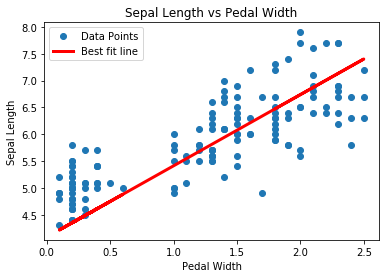

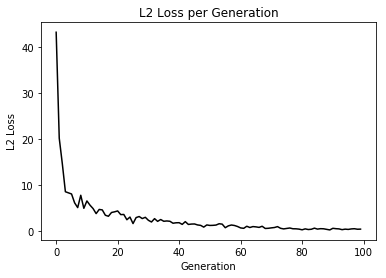

In [70]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

In [73]:
loss_vec

[43.20417,
 20.176662,
 14.636985,
 8.5414791,
 8.2929277,
 8.0524483,
 6.1276708,
 5.088923,
 7.772604,
 4.9401598,
 6.5391564,
 5.6206465,
 4.886754,
 3.7861793,
 4.6900468,
 4.5889225,
 3.4283106,
 3.2097437,
 4.0280719,
 4.1724815,
 4.3648677,
 3.5684919,
 3.5968506,
 2.4527981,
 3.0337338,
 1.6228142,
 2.9221539,
 3.1514177,
 2.7081978,
 2.9794648,
 2.3297377,
 1.9626869,
 2.6912112,
 2.1002982,
 2.5015974,
 2.1206448,
 2.186923,
 2.1190951,
 1.6938345,
 1.7901627,
 1.8090739,
 1.4427819,
 2.0386705,
 1.4312165,
 1.5123421,
 1.5342129,
 1.3200195,
 1.2281082,
 0.84979838,
 1.323032,
 1.212676,
 1.2344832,
 1.2967297,
 1.5813103,
 1.4989917,
 0.72001708,
 1.1225302,
 1.3060969,
 1.2010766,
 0.98150969,
 0.67330909,
 0.58706301,
 1.0335382,
 0.7631526,
 0.96471161,
 0.89932662,
 0.78946447,
 1.0359607,
 0.55565143,
 0.59299684,
 0.68524152,
 0.76255423,
 0.95585603,
 0.59041041,
 0.45954001,
 0.56155932,
 0.65736967,
 0.49034846,
 0.48039842,
 0.41233394,
 0.26405939,
 0.46865994,
 

### Lasso & Ridge Regression

In [71]:
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 50
learning_rate = 0.001

In [72]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [74]:
lasso_param = tf.constant(0.9)

In [75]:
heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.mul(-100., tf.sub(A, lasso_param)))))
regularization_param = tf.mul(heavyside_step, 99.)
loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)

In [76]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [77]:
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
    print('Loss = ''' + str(temp_loss))

Step #1 A = [[ 0.48819751]] b = [[-1.07712603]]
Loss = [[ 38.37264252]]
Step #2 A = [[ 0.50341809]] b = [[-1.06431878]]
Loss = [[ 40.96282578]]
Step #3 A = [[ 0.52081305]] b = [[-1.05166733]]
Loss = [[ 39.88078308]]
Step #4 A = [[ 0.53760761]] b = [[-1.0389837]]
Loss = [[ 40.13547134]]
Step #5 A = [[ 0.55362904]] b = [[-1.0261234]]
Loss = [[ 41.33036041]]
Step #6 A = [[ 0.5696733]] b = [[-1.0135473]]
Loss = [[ 39.50498199]]
Step #7 A = [[ 0.58685261]] b = [[-1.00112057]]
Loss = [[ 38.53321457]]
Step #8 A = [[ 0.60032392]] b = [[-0.98878384]]
Loss = [[ 37.96611404]]
Step #9 A = [[ 0.61408621]] b = [[-0.97679502]]
Loss = [[ 35.88692474]]
Step #10 A = [[ 0.62849849]] b = [[-0.96478385]]
Loss = [[ 35.93387604]]
Step #11 A = [[ 0.64455289]] b = [[-0.95256633]]
Loss = [[ 37.18465424]]
Step #12 A = [[ 0.65782827]] b = [[-0.94069147]]
Loss = [[ 35.15828705]]
Step #13 A = [[ 0.67069328]] b = [[-0.92856508]]
Loss = [[ 36.71245193]]
Step #14 A = [[ 0.6837607]] b = [[-0.91680467]]
Loss = [[ 34.475

Loss = [[ 20.88173676]]
Step #124 A = [[ 0.83347541]] b = [[ 0.22292539]]
Loss = [[ 20.90131187]]
Step #125 A = [[ 0.83254838]] b = [[ 0.23197384]]
Loss = [[ 20.67923546]]
Step #126 A = [[ 0.83257163]] b = [[ 0.24129386]]
Loss = [[ 21.93172073]]
Step #127 A = [[ 0.83304733]] b = [[ 0.25058392]]
Loss = [[ 21.85543251]]
Step #128 A = [[ 0.83238369]] b = [[ 0.25977814]]
Loss = [[ 21.36966896]]
Step #129 A = [[ 0.83272392]] b = [[ 0.26865447]]
Loss = [[ 20.01960754]]
Step #130 A = [[ 0.83173132]] b = [[ 0.27812719]]
Loss = [[ 22.71150208]]
Step #131 A = [[ 0.83116961]] b = [[ 0.2870006]]
Loss = [[ 19.92490196]]
Step #132 A = [[ 0.83254254]] b = [[ 0.29615667]]
Loss = [[ 21.21594429]]
Step #133 A = [[ 0.83138549]] b = [[ 0.3050389]]
Loss = [[ 19.88650131]]
Step #134 A = [[ 0.83155555]] b = [[ 0.31397003]]
Loss = [[ 20.13622284]]
Step #135 A = [[ 0.83232677]] b = [[ 0.32304382]]
Loss = [[ 20.89263153]]
Step #136 A = [[ 0.83188546]] b = [[ 0.33205816]]
Loss = [[ 20.59051132]]
Step #137 A = [[

Step #256 A = [[ 0.8291961]] b = [[ 1.29567397]]
Loss = [[ 12.60342789]]
Step #257 A = [[ 0.82851887]] b = [[ 1.3029145]]
Loss = [[ 13.38332939]]
Step #258 A = [[ 0.8290019]] b = [[ 1.31007278]]
Loss = [[ 13.09155083]]
Step #259 A = [[ 0.82802135]] b = [[ 1.31717789]]
Loss = [[ 12.91305923]]
Step #260 A = [[ 0.82921547]] b = [[ 1.32440841]]
Loss = [[ 13.30125618]]
Step #261 A = [[ 0.82934791]] b = [[ 1.33163178]]
Loss = [[ 13.28796864]]
Step #262 A = [[ 0.83002561]] b = [[ 1.3386786]]
Loss = [[ 12.70083523]]
Step #263 A = [[ 0.83100373]] b = [[ 1.34564722]]
Loss = [[ 12.41119099]]
Step #264 A = [[ 0.82840461]] b = [[ 1.35248625]]
Loss = [[ 11.96826553]]
Step #265 A = [[ 0.8287487]] b = [[ 1.3594358]]
Loss = [[ 12.27732086]]
Step #266 A = [[ 0.82935601]] b = [[ 1.36647081]]
Loss = [[ 12.60267448]]
Step #267 A = [[ 0.82807004]] b = [[ 1.37355661]]
Loss = [[ 12.78939056]]
Step #268 A = [[ 0.82856113]] b = [[ 1.38069522]]
Loss = [[ 12.94299698]]
Step #269 A = [[ 0.8294161]] b = [[ 1.387705

Step #369 A = [[ 0.82743639]] b = [[ 2.01518822]]
Loss = [[ 8.43528366]]
Step #370 A = [[ 0.82715535]] b = [[ 2.02081084]]
Loss = [[ 8.12777615]]
Step #371 A = [[ 0.82749259]] b = [[ 2.02658272]]
Loss = [[ 8.62686539]]
Step #372 A = [[ 0.82663012]] b = [[ 2.03216076]]
Loss = [[ 8.02175331]]
Step #373 A = [[ 0.82791191]] b = [[ 2.03783226]]
Loss = [[ 8.30449867]]
Step #374 A = [[ 0.82683122]] b = [[ 2.04338336]]
Loss = [[ 7.91678715]]
Step #375 A = [[ 0.82738417]] b = [[ 2.04897213]]
Loss = [[ 8.14654064]]
Step #376 A = [[ 0.82782769]] b = [[ 2.05459666]]
Loss = [[ 8.18273354]]
Step #377 A = [[ 0.82682002]] b = [[ 2.0601573]]
Loss = [[ 7.96671486]]
Step #378 A = [[ 0.82724833]] b = [[ 2.0659306]]
Loss = [[ 8.56803608]]
Step #379 A = [[ 0.82595068]] b = [[ 2.07137179]]
Loss = [[ 7.65748692]]
Step #380 A = [[ 0.82719219]] b = [[ 2.0770824]]
Loss = [[ 8.36352921]]
Step #381 A = [[ 0.82708561]] b = [[ 2.08274889]]
Loss = [[ 8.30978584]]
Step #382 A = [[ 0.82695526]] b = [[ 2.08817744]]
Loss

Step #489 A = [[ 0.82382959]] b = [[ 2.62196732]]
Loss = [[ 5.57967138]]
Step #490 A = [[ 0.82550597]] b = [[ 2.62660837]]
Loss = [[ 5.60319471]]
Step #491 A = [[ 0.8242262]] b = [[ 2.63072419]]
Loss = [[ 4.48553562]]
Step #492 A = [[ 0.8237555]] b = [[ 2.63485956]]
Loss = [[ 4.40467024]]
Step #493 A = [[ 0.82438523]] b = [[ 2.63947821]]
Loss = [[ 5.62146187]]
Step #494 A = [[ 0.8251605]] b = [[ 2.64401484]]
Loss = [[ 5.38574457]]
Step #495 A = [[ 0.82465357]] b = [[ 2.64841604]]
Loss = [[ 5.06787825]]
Step #496 A = [[ 0.82473111]] b = [[ 2.65293479]]
Loss = [[ 5.37807941]]
Step #497 A = [[ 0.8254627]] b = [[ 2.65730476]]
Loss = [[ 5.00740862]]
Step #498 A = [[ 0.82594228]] b = [[ 2.66182375]]
Loss = [[ 5.43439817]]
Step #499 A = [[ 0.82520908]] b = [[ 2.66630483]]
Loss = [[ 5.22929859]]
Step #500 A = [[ 0.82458615]] b = [[ 2.6704824]]
Loss = [[ 4.66224527]]
Step #501 A = [[ 0.82406217]] b = [[ 2.67466974]]
Loss = [[ 4.59025717]]
Step #502 A = [[ 0.82509124]] b = [[ 2.67932081]]
Loss =

Step #620 A = [[ 0.82194918]] b = [[ 3.13829255]]
Loss = [[ 3.04830503]]
Step #621 A = [[ 0.82158333]] b = [[ 3.14168358]]
Loss = [[ 3.11042666]]
Step #622 A = [[ 0.8223598]] b = [[ 3.14517045]]
Loss = [[ 3.31066322]]
Step #623 A = [[ 0.82170874]] b = [[ 3.14836311]]
Loss = [[ 2.72706032]]
Step #624 A = [[ 0.82193297]] b = [[ 3.15162635]]
Loss = [[ 2.89347196]]
Step #625 A = [[ 0.82205045]] b = [[ 3.1550498]]
Loss = [[ 3.11354518]]
Step #626 A = [[ 0.82237488]] b = [[ 3.15848351]]
Loss = [[ 3.27761173]]
Step #627 A = [[ 0.82227522]] b = [[ 3.16180062]]
Loss = [[ 3.01463509]]
Step #628 A = [[ 0.82218558]] b = [[ 3.16525602]]
Loss = [[ 3.24342012]]
Step #629 A = [[ 0.82228625]] b = [[ 3.16880274]]
Loss = [[ 3.37019396]]
Step #630 A = [[ 0.82191324]] b = [[ 3.17221308]]
Loss = [[ 3.1762619]]
Step #631 A = [[ 0.82316577]] b = [[ 3.17606521]]
Loss = [[ 3.96303773]]
Step #632 A = [[ 0.82304847]] b = [[ 3.17939758]]
Loss = [[ 3.03380466]]
Step #633 A = [[ 0.82275254]] b = [[ 3.1825676]]
Loss 

Loss = [[ 1.85834277]]
Step #743 A = [[ 0.81999052]] b = [[ 3.51664925]]
Loss = [[ 2.33555818]]
Step #744 A = [[ 0.81958085]] b = [[ 3.51922989]]
Loss = [[ 1.97142279]]
Step #745 A = [[ 0.82035369]] b = [[ 3.52199173]]
Loss = [[ 2.17931151]]
Step #746 A = [[ 0.82012677]] b = [[ 3.52468157]]
Loss = [[ 2.0173347]]
Step #747 A = [[ 0.81996924]] b = [[ 3.52729106]]
Loss = [[ 1.8845371]]
Step #748 A = [[ 0.81960642]] b = [[ 3.52974796]]
Loss = [[ 1.78147018]]
Step #749 A = [[ 0.81951565]] b = [[ 3.53233528]]
Loss = [[ 1.85996485]]
Step #750 A = [[ 0.81990188]] b = [[ 3.53498673]]
Loss = [[ 2.00395942]]
Step #751 A = [[ 0.82012516]] b = [[ 3.53773046]]
Loss = [[ 2.15278101]]
Step #752 A = [[ 0.81994301]] b = [[ 3.54034448]]
Loss = [[ 1.95365286]]
Step #753 A = [[ 0.82032764]] b = [[ 3.5431025]]
Loss = [[ 2.24495792]]
Step #754 A = [[ 0.82063824]] b = [[ 3.54592109]]
Loss = [[ 2.32302475]]
Step #755 A = [[ 0.82032549]] b = [[ 3.54858899]]
Loss = [[ 2.05050945]]
Step #756 A = [[ 0.81977785]] b

Step #873 A = [[ 0.81711829]] b = [[ 3.82664561]]
Loss = [[ 1.20234692]]
Step #874 A = [[ 0.81720608]] b = [[ 3.8288064]]
Loss = [[ 1.36086214]]
Step #875 A = [[ 0.81762075]] b = [[ 3.83097625]]
Loss = [[ 1.46618164]]
Step #876 A = [[ 0.81740761]] b = [[ 3.83301783]]
Loss = [[ 1.24952912]]
Step #877 A = [[ 0.81762403]] b = [[ 3.83507943]]
Loss = [[ 1.3505863]]
Step #878 A = [[ 0.81797135]] b = [[ 3.83739161]]
Loss = [[ 1.60146821]]
Step #879 A = [[ 0.81778187]] b = [[ 3.83943558]]
Loss = [[ 1.22469902]]
Step #880 A = [[ 0.81817496]] b = [[ 3.84165049]]
Loss = [[ 1.46416521]]
Step #881 A = [[ 0.81770736]] b = [[ 3.84371257]]
Loss = [[ 1.29157591]]
Step #882 A = [[ 0.81760353]] b = [[ 3.84576011]]
Loss = [[ 1.26806009]]
Step #883 A = [[ 0.81709868]] b = [[ 3.84784245]]
Loss = [[ 1.25898421]]
Step #884 A = [[ 0.81698662]] b = [[ 3.84984398]]
Loss = [[ 1.22492182]]
Step #885 A = [[ 0.817357]] b = [[ 3.85181999]]
Loss = [[ 1.2773596]]
Step #886 A = [[ 0.81746346]] b = [[ 3.85382795]]
Loss =

Loss = [[ 0.99880886]]
Step #990 A = [[ 0.81588048]] b = [[ 4.04276419]]
Loss = [[ 1.14912236]]
Step #991 A = [[ 0.81513149]] b = [[ 4.04420805]]
Loss = [[ 0.7237891]]
Step #992 A = [[ 0.81528175]] b = [[ 4.04578114]]
Loss = [[ 0.8537544]]
Step #993 A = [[ 0.81626815]] b = [[ 4.0477066]]
Loss = [[ 1.2673986]]
Step #994 A = [[ 0.81652564]] b = [[ 4.04948044]]
Loss = [[ 1.10365391]]
Step #995 A = [[ 0.81611174]] b = [[ 4.05106592]]
Loss = [[ 0.89331925]]
Step #996 A = [[ 0.81643438]] b = [[ 4.05288744]]
Loss = [[ 1.11195862]]
Step #997 A = [[ 0.81605548]] b = [[ 4.05454159]]
Loss = [[ 0.99464041]]
Step #998 A = [[ 0.81573892]] b = [[ 4.05611897]]
Loss = [[ 0.93617123]]
Step #999 A = [[ 0.81557471]] b = [[ 4.05768776]]
Loss = [[ 0.84808844]]
Step #1000 A = [[ 0.8155942]] b = [[ 4.05936575]]
Loss = [[ 0.93586087]]
Step #1001 A = [[ 0.8155598]] b = [[ 4.06100941]]
Loss = [[ 0.91133559]]
Step #1002 A = [[ 0.8155762]] b = [[ 4.06262207]]
Loss = [[ 0.94624591]]
Step #1003 A = [[ 0.81497538]] b

Loss = [[ 0.62526965]]
Step #1106 A = [[ 0.81366271]] b = [[ 4.21405125]]
Loss = [[ 0.74147803]]
Step #1107 A = [[ 0.81356657]] b = [[ 4.21537018]]
Loss = [[ 0.7055127]]
Step #1108 A = [[ 0.81368226]] b = [[ 4.21684408]]
Loss = [[ 0.71511751]]
Step #1109 A = [[ 0.81389683]] b = [[ 4.21822929]]
Loss = [[ 0.74217117]]
Step #1110 A = [[ 0.81373775]] b = [[ 4.2193923]]
Loss = [[ 0.54094243]]
Step #1111 A = [[ 0.81374317]] b = [[ 4.22068691]]
Loss = [[ 0.70099992]]
Step #1112 A = [[ 0.81365186]] b = [[ 4.22193956]]
Loss = [[ 0.60186201]]
Step #1113 A = [[ 0.81355315]] b = [[ 4.22315168]]
Loss = [[ 0.58211803]]
Step #1114 A = [[ 0.81338143]] b = [[ 4.22431231]]
Loss = [[ 0.55088872]]
Step #1115 A = [[ 0.81334084]] b = [[ 4.22567797]]
Loss = [[ 0.72733492]]
Step #1116 A = [[ 0.81323534]] b = [[ 4.22692585]]
Loss = [[ 0.63310027]]
Step #1117 A = [[ 0.81295627]] b = [[ 4.22800016]]
Loss = [[ 0.49216238]]
Step #1118 A = [[ 0.81277251]] b = [[ 4.22910309]]
Loss = [[ 0.52954334]]
Step #1119 A = [[

Step #1219 A = [[ 0.81196594]] b = [[ 4.34759045]]
Loss = [[ 0.54384136]]
Step #1220 A = [[ 0.81151956]] b = [[ 4.34857893]]
Loss = [[ 0.39807546]]
Step #1221 A = [[ 0.81155419]] b = [[ 4.34973431]]
Loss = [[ 0.47354481]]
Step #1222 A = [[ 0.81123817]] b = [[ 4.3508091]]
Loss = [[ 0.55774873]]
Step #1223 A = [[ 0.81134486]] b = [[ 4.35190058]]
Loss = [[ 0.5315854]]
Step #1224 A = [[ 0.81146592]] b = [[ 4.35298443]]
Loss = [[ 0.55337924]]
Step #1225 A = [[ 0.81172436]] b = [[ 4.35413504]]
Loss = [[ 0.55540913]]
Step #1226 A = [[ 0.81191343]] b = [[ 4.35519361]]
Loss = [[ 0.52428365]]
Step #1227 A = [[ 0.81169504]] b = [[ 4.35622358]]
Loss = [[ 0.44544378]]
Step #1228 A = [[ 0.81152958]] b = [[ 4.35719967]]
Loss = [[ 0.47897103]]
Step #1229 A = [[ 0.81143588]] b = [[ 4.35812807]]
Loss = [[ 0.46460715]]
Step #1230 A = [[ 0.81128937]] b = [[ 4.35908985]]
Loss = [[ 0.51351929]]
Step #1231 A = [[ 0.81094116]] b = [[ 4.3598876]]
Loss = [[ 0.42114368]]
Step #1232 A = [[ 0.81172717]] b = [[ 4.3

Step #1357 A = [[ 0.80916744]] b = [[ 4.47536564]]
Loss = [[ 0.43935987]]
Step #1358 A = [[ 0.80927068]] b = [[ 4.47626352]]
Loss = [[ 0.45265684]]
Step #1359 A = [[ 0.80923182]] b = [[ 4.47707701]]
Loss = [[ 0.39285967]]
Step #1360 A = [[ 0.80916232]] b = [[ 4.4777813]]
Loss = [[ 0.37092414]]
Step #1361 A = [[ 0.8089627]] b = [[ 4.47865963]]
Loss = [[ 0.43068063]]
Step #1362 A = [[ 0.80921483]] b = [[ 4.47971964]]
Loss = [[ 0.51936239]]
Step #1363 A = [[ 0.80923903]] b = [[ 4.48051119]]
Loss = [[ 0.44863075]]
Step #1364 A = [[ 0.80897284]] b = [[ 4.4812026]]
Loss = [[ 0.29454717]]
Step #1365 A = [[ 0.80849373]] b = [[ 4.48176765]]
Loss = [[ 0.29527777]]
Step #1366 A = [[ 0.80846411]] b = [[ 4.48256826]]
Loss = [[ 0.32045901]]
Step #1367 A = [[ 0.80838275]] b = [[ 4.48333836]]
Loss = [[ 0.36636746]]
Step #1368 A = [[ 0.80822015]] b = [[ 4.48399496]]
Loss = [[ 0.37093508]]
Step #1369 A = [[ 0.80809045]] b = [[ 4.48485994]]
Loss = [[ 0.43925846]]
Step #1370 A = [[ 0.80774599]] b = [[ 4.4

Step #1469 A = [[ 0.80744714]] b = [[ 4.55483389]]
Loss = [[ 0.40975764]]
Step #1470 A = [[ 0.80717081]] b = [[ 4.55534506]]
Loss = [[ 0.2711513]]
Step #1471 A = [[ 0.80722606]] b = [[ 4.55604506]]
Loss = [[ 0.34475812]]
Step #1472 A = [[ 0.80673462]] b = [[ 4.55646181]]
Loss = [[ 0.28049421]]
Step #1473 A = [[ 0.8067947]] b = [[ 4.55700397]]
Loss = [[ 0.32083139]]
Step #1474 A = [[ 0.80700302]] b = [[ 4.55778599]]
Loss = [[ 0.39575985]]
Step #1475 A = [[ 0.80732125]] b = [[ 4.55855227]]
Loss = [[ 0.40229034]]
Step #1476 A = [[ 0.80676472]] b = [[ 4.55903244]]
Loss = [[ 0.24313237]]
Step #1477 A = [[ 0.80652308]] b = [[ 4.55956793]]
Loss = [[ 0.21093868]]
Step #1478 A = [[ 0.80629081]] b = [[ 4.5600605]]
Loss = [[ 0.22880632]]
Step #1479 A = [[ 0.80635315]] b = [[ 4.56078196]]
Loss = [[ 0.32651234]]
Step #1480 A = [[ 0.80665636]] b = [[ 4.56159306]]
Loss = [[ 0.46126306]]
Step #1481 A = [[ 0.80649024]] b = [[ 4.56207848]]
Loss = [[ 0.28176612]]
Step #1482 A = [[ 0.80609208]] b = [[ 4.5

In [78]:
[slope] = sess.run(A)

In [79]:
[y_intercept] = sess.run(b)

In [80]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

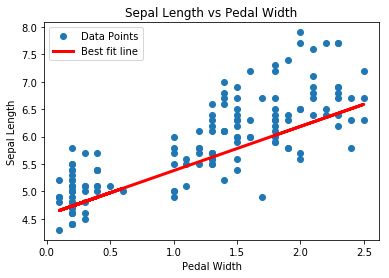

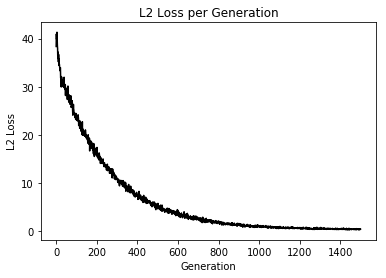

In [81]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [92]:
ops.reset_default_graph()

# Create graph
sess = tf.Session()

# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [94]:

seed = 13
np.random.seed(seed)
tf.set_random_seed(seed)

# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare the elastic net loss function
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

In [95]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%250==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #250 A = [[ 1.26014626]
 [ 0.4016138 ]
 [ 0.40159121]] b = [[-0.14889474]]
Loss = [ 1.59188581]
Step #500 A = [[ 1.17897248]
 [ 0.46715766]
 [ 0.29896322]] b = [[-0.0677181]]
Loss = [ 1.46314824]
Step #750 A = [[ 1.13416564]
 [ 0.51899707]
 [ 0.21090424]] b = [[ 0.01904622]]
Loss = [ 1.37157845]
Step #1000 A = [[ 1.09745109]
 [ 0.54604095]
 [ 0.13102381]] b = [[ 0.10402215]]
Loss = [ 1.27774763]


In [96]:
[[sw_coef], [pl_coef], [pw_ceof]] = sess.run(A)
[y_intercept] = sess.run(b)

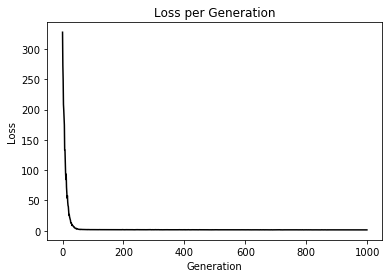

In [97]:
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()